## 🐱 🐶 Cat and Dog Classification

Given *images of cats and dogs*, let's try to classify which **pet** is present in a given image.

We will use a TensorFlow/Keras CNN to make our predictions. 

Data source: https://www.kaggle.com/datasets/tongpython/cat-and-dog

### Importing Libraries

In [22]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
image_dir = Path('training_set')

### Create File DataFrame

In [3]:
filepaths = list(image_dir.glob(r'**/*.jpg'))
filepaths

[PosixPath('training_set/cats/cat.2067.jpg'),
 PosixPath('training_set/cats/cat.1030.jpg'),
 PosixPath('training_set/cats/cat.1332.jpg'),
 PosixPath('training_set/cats/cat.1113.jpg'),
 PosixPath('training_set/cats/cat.123.jpg'),
 PosixPath('training_set/cats/cat.2594.jpg'),
 PosixPath('training_set/cats/cat.2170.jpg'),
 PosixPath('training_set/cats/cat.3289.jpg'),
 PosixPath('training_set/cats/cat.1908.jpg'),
 PosixPath('training_set/cats/cat.3484.jpg'),
 PosixPath('training_set/cats/cat.2044.jpg'),
 PosixPath('training_set/cats/cat.3017.jpg'),
 PosixPath('training_set/cats/cat.600.jpg'),
 PosixPath('training_set/cats/cat.3881.jpg'),
 PosixPath('training_set/cats/cat.850.jpg'),
 PosixPath('training_set/cats/cat.1879.jpg'),
 PosixPath('training_set/cats/cat.1036.jpg'),
 PosixPath('training_set/cats/cat.2303.jpg'),
 PosixPath('training_set/cats/cat.1903.jpg'),
 PosixPath('training_set/cats/cat.3817.jpg'),
 PosixPath('training_set/cats/cat.1365.jpg'),
 PosixPath('training_set/cats/cat.45.

In [4]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 

In [5]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

image_df = pd.concat([filepaths, labels], axis=1)

In [6]:
image_df

,Filepath,Label
0,training_set/cats/cat.2067.jpg,cats
1,training_set/cats/cat.1030.jpg,cats
2,training_set/cats/cat.1332.jpg,cats
3,training_set/cats/cat.1113.jpg,cats
4,training_set/cats/cat.123.jpg,cats
...,...,...
795,training_set/dogs/dog.2488.jpg,dogs
796,training_set/dogs/dog.3590.jpg,dogs
797,training_set/dogs/dog.2757.jpg,dogs
798,training_set/dogs/dog.376.jpg,dogs


In [7]:
train_df, test_df = train_test_split(image_df, train_size=0.7, shuffle=True, random_state=45)

In [8]:
train_df

,Filepath,Label
550,training_set/dogs/dog.2990.jpg,dogs
410,training_set/dogs/dog.3444.jpg,dogs
79,training_set/cats/cat.856.jpg,cats
766,training_set/dogs/dog.3429.jpg,dogs
514,training_set/dogs/dog.1996.jpg,dogs
...,...,...
725,training_set/dogs/dog.881.jpg,dogs
607,training_set/dogs/dog.3553.jpg,dogs
544,training_set/dogs/dog.3086.jpg,dogs
643,training_set/dogs/dog.1795.jpg,dogs


In [9]:
test_df

,Filepath,Label
418,training_set/dogs/dog.1162.jpg,dogs
67,training_set/cats/cat.594.jpg,cats
204,training_set/cats/cat.2503.jpg,cats
250,training_set/cats/cat.3730.jpg,cats
472,training_set/dogs/dog.1650.jpg,dogs
...,...,...
694,training_set/dogs/dog.906.jpg,dogs
182,training_set/cats/cat.2647.jpg,cats
335,training_set/cats/cat.2891.jpg,cats
253,training_set/cats/cat.2175.jpg,cats


### Load Image Data

In [10]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [11]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

Found 448 validated image filenames belonging to 2 classes.
Found 112 validated image filenames belonging to 2 classes.
Found 240 validated image filenames belonging to 2 classes.


### Training

In [14]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(120, activation='relu')(x)
x = tf.keras.layers.Dense(120, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [15]:
train_images.class_indices

{'cats': 0, 'dogs': 1}

In [16]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [17]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [18]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=
    [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            patience=3
        )
    ]
)

Epoch 1/100


2025-04-15 10:57:30.590136: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


14/14 [==============================] - ETA: 0s - loss: 0.6915 - accuracy: 0.5179 

2025-04-15 10:57:43.637080: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


14/14 [==============================] - 16s 1s/step - loss: 0.6915 - accuracy: 0.5179 - val_loss: 0.7061 - val_accuracy: 0.4196 - lr: 0.0010
Epoch 2/100
14/14 [==============================] - 14s 978ms/step - loss: 0.6946 - accuracy: 0.5223 - val_loss: 0.7028 - val_accuracy: 0.4196 - lr: 0.0010
Epoch 3/100
14/14 [==============================] - 13s 942ms/step - loss: 0.6920 - accuracy: 0.4799 - val_loss: 0.6930 - val_accuracy: 0.4196 - lr: 0.0010
Epoch 4/100
14/14 [==============================] - 13s 905ms/step - loss: 0.6902 - accuracy: 0.5223 - val_loss: 0.7046 - val_accuracy: 0.4196 - lr: 0.0010
Epoch 5/100
14/14 [==============================] - 13s 886ms/step - loss: 0.6904 - accuracy: 0.5246 - val_loss: 0.6926 - val_accuracy: 0.4196 - lr: 0.0010
Epoch 6/100
14/14 [==============================] - 13s 901ms/step - loss: 0.6869 - accuracy: 0.5223 - val_loss: 0.6976 - val_accuracy: 0.4196 - lr: 0.0010
Epoch 7/100
14/14 [==============================] - 11s 796ms/step - los

### Results

In [20]:
results = model.evaluate(test_images)

print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

2025-04-15 11:09:22.991047: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


8/8 [==============================] - 2s 171ms/step - loss: 0.6627 - accuracy: 0.5500
Test Loss: 0.66268
Test Accuracy: 55.00%


2025-04-15 11:14:09.450764: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


8/8 [==============================] - 2s 165ms/step


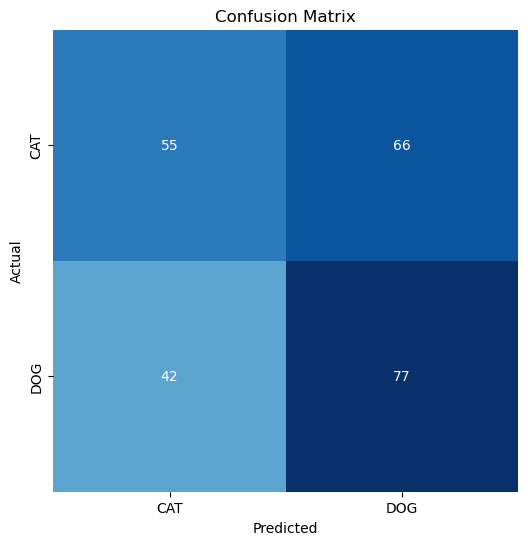

In [21]:
predictions = (model.predict(test_images) >= 0.5).astype(int)

cm = confusion_matrix(test_images.labels, predictions, labels=[0,1])

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=['CAT', 'DOG'])
plt.yticks(ticks=[0.5, 1.5], labels=['CAT', 'DOG'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [25]:
clr = classification_report(test_images.labels, predictions, labels=[0,1], target_names=['CAT', 'DOG'])
print("Classification Report:\n-------------------------\n", clr)

Classification Report:
-------------------------
               precision    recall  f1-score   support

         CAT       0.57      0.45      0.50       121
         DOG       0.54      0.65      0.59       119

    accuracy                           0.55       240
   macro avg       0.55      0.55      0.55       240
weighted avg       0.55      0.55      0.55       240

